### Lec 11-1: CNN introduction 

##### Convolutional Neural Network
<left><img src= 'img/cnn0.PNG' width="70%"></left>

#### <font color = 'yellow' > CNN의 기본원리 </font>
- 크기가 32 x32 pixels 이고 depth 즉 color가 3인, 32x32x3의 이미지에 대해 
- 임의의 크기, 예를 들어 5x5x3의 filter(weight)를 적용하여 하나의 값을 얻어낸다. 
- 이 과정을 반복하여 전체에 대한 값을 얻는다. 

<left><img src= 'img/cnn1.PNG' width="50%"></left>

- filter를 지정된 칸수(stride)만큼 계속 이동하면서, 전체 이미지에 대한 값들을 수집한다. 
- 이때 결과물, 즉 출력 크기 = (입력 크기 - 필터 크기) / stride 크기 +1

<left><img src= 'img/stride.PNG' width="50%"></left>

- 그런데 convolutinal layer를 거칠 때마다 크기가 작아지는 문제가 발생한다. 
- stride 크기에 상관없이 최소한 (필터 크기-1)만큼 줄어들게 되는데, 원본 이미지의 크기가 줄어들지 않도록 padding을 넣는다. 
- 보통은 stride를 1로 하기 때문에 padding의 크기 또한 1이 된며, 테두리 전체에 대해 추가되기 때문에 크기는 2만큼 증가한다.

<left><img src= 'img/padding.PNG' width="50%"></left>

- 아래 그림에서 원본의 사이즈는 32, 필터의 크기는 5, stride = 1 이므로 
- 출력결과(activation map)ation map)은, (32-5)/1+1 = 28 이다. (no padding)
- 6개의 필터가 사용되었으므로, total activation maps = (28,28,6) 

<left><img src= 'img/cnn2.PNG' width="50%"></left>

### Lec 11-2: CNN의 핵심 - Pooling, max pooling, fully connected 

- pooling은 sampling, resizing과 같은 의미이다. 
- 아래 그림에서 4x4의 원본에 대해 2x2의 필터가 stride = 2로 주어졌으므로, output size = 2x2이다. 
- 이때 예를들어 첫번째 필터링 부분, [1,1,5,6]을 하나의 값으로 바꿔줘야 하는데, 흔히 max값을 사용한다. (max pooling)

<left><img src= 'img/pooling.PNG' width="50%"></left>

- RNN의 특징은 처음부터 끝까지 layer들이 하나로 연결되어 있다는 것이다. 
- 이것을 Fully Connected 라고 한다. 

<left><img src= 'img/cnn0.PNG' width="60%"></left>

##### Question. 왜 Max Pooling을 사용할까?
- mean, median, min, max 등을 고려할 수 있으나, 
- 평균은 필터 영역의 특징을 표현하는데 부적합. 평균을 사용하면 여러 번의 pooling을 거치면 전체 값들이 비슷해지는 증상을 보일것이다. (평균의 평균의 평균? 결국 모든 그림이 다 똑같은 그림이라는 결론 도출?)  
- min을 사용한다면 LeRU를 거치면서 음수는 0이 되어 버린다. 
- 실제로 자연계에서도 우리는 보이는 모든 것을 기억하는 것이 아니라 두드러진 특징 몇 가지를 기억하는 것임. CNN에서 두드러진 특징을 찾기 위한 방법이 max pooling이다.

### Lec 11-3: CNN 발전과정과 사례들

#### <font color = 'yellow'> 1. LeNet </font>
- 1998년 Prof. LeCun에 의해 만들어진 고전 모델, 6개의 hidden layer 사용 
1. Input - 크기 32x32x1. 흑백 이미지. (필터 5x5, stride 1)
2. C1 - 크기 28x28x6. feature maps 6개. (필터 2x2, subsampling)
3. S2 - 크기 14x14x6. feature maps 6개. (필터 5x5, stride 1)
4. C3 - 크기 10x10x16. feature maps 16개
5. S4 - 크기 5x5x16. feature maps 16개.
6. C5 - FC(Full Connection )120개
7. F6 - FC(Full Connection) 84개
8. Output - GC(Gaussian Connections) 10개. (최종 분류)

<left><img src= 'img/lanet.PNG' width="80%"></left>

#### <font color = 'yellow'> 2. AlexNet </font>
- 2012년에 Prof.Hint의 lab에서 발표 
- 227x227x3의 원본이미지에 대해, Relu/Dropout/Ensemble을 동원하여 정확도를 높임  

<left><img src= 'img/alexnet.PNG' width="80%"></left>

#### <font color = 'yellow'> 3. GoogLeNet </font>
- 2014년 Google이 발표, inception module이라는 새로운 이론을 적용
- AlexNet에 비해 Deep 하나 Wide 하지는 않으며, 
- CNN에서 보통 마지막에만 두는 FC가 중간에 여러개 들어가는 것이 특징 

<left><img src= 'img/googlenet.PNG' width="80%"></left>

#### <font color = 'yellow'> 4. ResNet </font>
- 2015년 He가 발표, AlexNet이 사용했던 layer가 8개였던데 비해 무려 152개 layer를 사용
- 단 Fast forward 방식과 유사한 Fast Net을 적용하여 연산속도를 빠르게 구현했다. 

<left><img src= 'img/resnet.PNG' width="80%"></left>

#### <font color = 'yellow'> 참고. ResNet vs. GoogLeNet </font>
- ResNet과 GoogLeNet의 공통점을 보여주고 있다. 모양은 다르지만, 목표까지 가기 위해 거치는 layer의 갯수가 적다. 
- ResNet은 일렬로 배치해서 건너 뛰도록 설계했고, GoogLeNet은 처음부터 길을 여러 개 만들었다.
- GoogLeNet의 단점은 경로가 여러 개이긴 하지만, 특정 경로로 진입하면 경로에 포함된 모든 layer를 거쳐야 한다는 점이 아닐까 싶다. 
- ResNet이 매번 통과할 때마다 거치는 layer의 구성이 달라지는 반면 GoogLeNet은 구성이 같기 때문에 다양한 결과를 만들지 못하는 것이 단점으로 보인다. 
- ResNet이 GoogLeNet보다 더욱 균형 잡힌 결과를 만들어 낼 수 있는 구조라고 보여진다.

<left><img src= 'img/resandgoo.PNG' width="80%"></left>

#### <font color = 'yellow'> 5. CNN for sentence classification </font>
- 2014년 한국인 윤킴 교수가 만든 모델
- Text, Sentence 분석을 위해 많이 사용된다. 

<left><img src= 'img/yoonkim.PNG' width="80%"></left>

#### <font color = 'yellow'> 6. DeepMind AlphaGo </font>
- 19x19x48 이미지 사용 : 바둑판의 크기가 19x19이며, 돌의 특징을 48종으로 구분 (흑돌인지 백돌인지, 주변에 흑돌이 있는지 백돌이 있는지, 현재 정세가 어떠한지 등등..)
- 이후 이미지 크기에 패딩을 적용하여 23x23으로 변형 

<left><img src= 'img/nature.PNG' width="80%"></left>

### Lab 11-1: CNN Basics

In [1]:
import tensorflow as tf 
tf.__version__ 

'1.15.0'

In [2]:
#### 간단한 원본 이미지를 하나 만들어 보자 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]], 
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype = np.float32 )
print(image.shape)
plt.imshow(image.reshape(3,3), cmap = 'Greys')
## 1개의, 3x3x1인 이미지가 만들어 진다. 

(1, 3, 3, 1)


#### <font color = 'yellow'> 원리 이해 </font>
- 1개의 3x3x1 원본 이미지에 대해, 
- 2x2x1인 필터를 1개 적용(stride는 1) *필터의 값은 all = 1 
- 첫번째 필터결과 1+2+4+5 = 12, 두번째 필터결과 2+3+5+6 = 16, 3rd = 24, 4th = 28

<left><img src= 'img/simplecnn.PNG' width="60%"></left>

- 이때 padding 옵션을 VALID가 아닌 SAME으로 주면, 
- 원본이미지 크기와 같은 크기의 출력을 만들기 위해 tf가 자동으로 테두리(0값)을 추가한다. 
- 예를들어 3번째 필터링된 값은, 3+0+6+0 = 9

<left><img src= 'img/paddingsame.PNG' width="60%"></left>

In [3]:
print(image)

[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img (1, 2, 2, 1)
---------------------------------------
[[12. 16.]
 [24. 28.]]


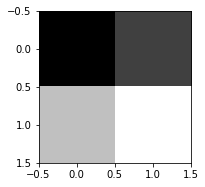

In [4]:
#### conv2d 함수로 CNN을 쉽게 구현할 수 있다. (padding = 'VALID')
print('image.shape', image.shape)

weight = tf.constant([[[ [1.]],[[1.] ]],
                      [[ [1.]],[[1.] ]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'VALID')
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d_img.shape)

#### 시각화를 위한 부분(option)
print('---------------------------------------')

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate (conv2d_img): 
    print(one_img.reshape(2,2)) 
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img (1, 3, 3, 1)
---------------------------------------
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


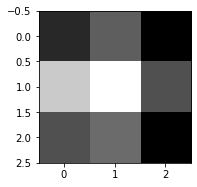

In [5]:
#### conv2d 함수로 CNN을 쉽게 구현할 수 있다. (padding = 'SAME')
print('image.shape', image.shape)

weight = tf.constant([[[ [1.]],[[1.] ]],
                      [[ [1.]],[[1.] ]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d_img.shape)

#### 시각화를 위한 부분(option)
print('---------------------------------------')

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate (conv2d_img): 
    print(one_img.reshape(3,3)) 
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img (1, 3, 3, 3)
---------------------------------------
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


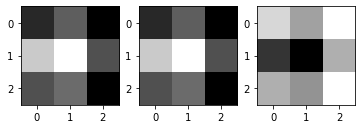

In [6]:
#### 같은 방법으로 filter를 3장 사용하면, 3개의 출력값을 얻게 된다. 
print('image.shape', image.shape)

weight = tf.constant([[[ [1., 10, -1]],[[1., 10, -1] ]],
                      [[ [1., 10, -1]],[[1., 10, -1] ]]])
print('weight.shape', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding = 'SAME')
conv2d_img = conv2d.eval()
print("conv2d_img", conv2d_img.shape)

#### 시각화를 위한 부분(option)
print('---------------------------------------')

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate (conv2d_img): 
    print(one_img.reshape(3,3)) 
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

#### <font color = 'yellow'> Max pooling의 원리 이해 </font>
- 2x2의 원본 이미지에 대해, 필터 사이즈 2x2 1개, strides = 1, 동일한 사이즈의 결과물을 얻기 위해 padding = 'SAME' 
- Max pooling으로 각 필터영역에서 max값들을 추출 
- 결과로 4,3,2,1의 2x2 이미지를 얻게되었다. 

<left><img src= 'img/maxp.PNG' width="80%"></left>

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


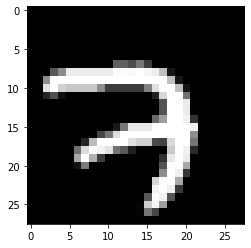

In [7]:
#### MNIST data loading, and check with image 
#### MNIST image size = 28x28
import warnings
warnings.filterwarnings('ignore')

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap = 'gray')

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


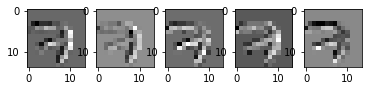

In [8]:
import random

sess = tf.InteractiveSession()
img = img.reshape(-1, 28, 28, 1)  ## -1은 몇개인지 모르니 알아서 하라는 뜻, 즉 28x28x1인 000개의 이미지
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))  ## 3x3x1의 필터 5개 사용 
conv2d = tf.nn.conv2d(img, W1, strides = [1,2,2,1], padding = 'SAME')  ## strides = 2, Zero padding 사용 
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()

#### Zero padding을 사용했지만 strides = 2이므로, 결과이미지 크기는 절반이 된다. 
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate (conv2d_img): 
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


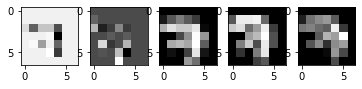

In [9]:
#### 다시!! max pooling을 적용해 보자 
pool = tf.nn.max_pool(conv2d, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
print(pool)

sess.run(tf.global_variables_initializer())
pool_img = pool.eval()

#### 앞서 CNN을 거치면서 conv2d의 크기가 절반으로 줄어 14x14가 되었다.  
#### Zero padding을 사용했지만 strides = 2이므로, 결과이미지 크기는 절반이 된다.(7x7)
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate (pool_img): 
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')

### Lab 11-2: MNIST 99% with CNN

In [10]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002102B2DA1D0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002102B2E2C50>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002102B2DA400>)

In [11]:
#### tf.get_variable은 이전에 사용했던 변수명을 기억한다. 아래 코드로 이를 초기화 
tf.reset_default_graph()

In [12]:
#### 먼저 input image를 적절하게 지정해 준다
#### MNIST는 28x28 사이즈의 흑백 이미지 784개로 이루어져 있으므로 ... 
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28,28,1])            
Y = tf.placeholder(tf.float32, [None, 10])

#### 1st layer 
#### 3x3x1의 필터를 32개 사용한 CNN을 거치고, 이를 다시 필터 2x2 & strides = 2로 sampleing(max_pooling)
#### 따라서 결과는 절반으로 줄어들어 14x14가 된다. 
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev = 0.01))
L1 = tf.nn.conv2d(X_img, W1, strides = [1,1,1,1], padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

#### 2nd layer 
#### layer 1의 결과를 다시 cnn에 투입, 필터는 3x3을 64개 사용 
#### 이를 다시 필터 2x2 & strides = 2로 sampleing(max_pooling) 
#### 따라서 결과는 절반으로 줄어들어 7x7이 된다. 
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev = 0.01))
L2 = tf.nn.conv2d(L1, W2, strides = [1,1,1,1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

#### Fully Connected에 넣기위해 값들을 펼친다. 7x7 사이즈의 이미지가 64개 생성되었으므로, 7x7x64 = 3136개의 결과 이미지
#### 최종 출력값은 0~9이므로 10이 된다. 
#### hyper parameters, 초기값 설정방법 지정, 가설과 cost 함수 설정, training 방법 설정 
L2_flat = tf.reshape(L2, [-1, 7*7*64])

learning_rate = 0.001
training_epochs = 15
batch_size = 100

W3 = tf.get_variable('W3', shape = [7*7*64, 10], initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2_flat, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

#### initialize 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### training 
print('Learning Started, It makes sometimes.')

for epoch in range(training_epochs) : 
    avg_cost = 0 
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch) : 
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print('Epoch:', epoch+1, 'cost = ', avg_cost)

print('Learning Finished')

#### test 
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict = {X: mnist.test.images, Y: mnist.test.labels}))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Learning Started, It makes sometimes.
Epoch: 1 cost =  0.33304703877392144
Epoch: 2 cost =  0.08886961246755985
Epoch: 3 cost =  0.06540637931617142
Epoch: 4 cost =  0.05338967634576627
Epoch: 5 cost =  0.047837416013618086
Epoch: 6 cost =  0.04072400415972382
Epoch: 7 cost =  0.03607198116411875
Epoch: 8 cost =  0.031376901979092514
Epoch: 9 cost =  0.02777647290093062
Epoch: 10 cost =  0.026408656040068968
Epoch: 11 cost =  0.0228589315071

- 정확도 향상을 위해 layer를 보다 많이 쌓는 경우도 위와 같은 코드를 반복하는 과정
- 단 drop out(keep_prob)의 설정에 주의, 여기서는 training = 0.7 & test = 1.0 

In [13]:
tf.reset_default_graph()

# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# dropout (keep_prob) rate  0.7~0.5 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])


# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)


# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)


# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])


# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)


# L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
# if you have a OOM error, please refer to lab-11-X-mnist_deep_cnn_low_memory.py

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
       X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Learning started. It takes sometime.
Epoch: 0001 cost = 0.405479272
Epoch: 0002 cost = 0.098291552
Epoch: 0003 cost = 0.074284309
Epoch: 0004 cost = 0.061162627
Epoch: 0005 cost = 0.052200512
Epoch: 0006 cost = 0.048186214
Epoch: 0007 cost = 0.042460790
Epoch: 0008 cost = 0.039284753
Epoch: 0009 cost = 0.035403663
Epoch: 0010 cost = 0.035181244
Epoch: 0011 cost = 0.033496085
Epoch: 0012 cost = 0.030472410
Epoch: 0013 cost = 0.029917258
Epoch: 0014 cost = 0.029276439
Epoch: 0015 cost = 0.027137286
Learning Finished!
Accuracy: 0.9939


- 첫번째 2 layers CNN : Epoch 15회, Accuracy 0.9897 
- 두번재 4 layers CNN : Epoch 15회, Accuracy 0.9932

### Lab 11-3: CNN class, layer, ensemble

- Class와 Layer를 사용해서, 복잡한 코드를 단순화 
- 7개 모델을 ensemble하여 예측결과를 얻는다. 

In [14]:
# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100


class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # dropout (keep_prob) rate  0.7~0.5 on training, but should be 1
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.3, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3,
                                         rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat,
                                     units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4,
                                         rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits,
                             feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy,
                             feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

# initialize
sess = tf.Session()

models = []
num_models = 2
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))

sess.run(tf.global_variables_initializer())

print('Learning Started!')

# train my model
for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        # train each model
        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

# Test model and check accuracy
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.Dense instead.
Learning Started!
Epoch: 0001 cost = [0.27946609 0.29032681]
Epoch: 0002 cost = [0.08662839 0.08849391]
Epoch: 0003 cost = [0.06624603 0.0659832 ]
Epoch: 0004 cost = [0.05688636 0.05652943]
Epoch: 0005 cost = [0.04583257 0.04818482]
Epoch: 0006 cost = [0.04168963 0.04336172]
Epoch: 0007 cost = [0.04026004 0.04128004]
Epoch: 0008 cost = [0.03610833 0.03585229]
Epoch: 0009 cost = [0.03544369 0.03459216]
Epoch: 0010 cost = [0.03054557 0.03273134]
Epoch: 0011 cost = [0.03130719 0.03169711]
Epoch: 0012 cost = [0.03029879 0.02957265]
Epoch: 0013 cost = [0.02816108 0.02877955]
Epoch: 0014 cost = [0.0276086  0.02664824]
Epoch: 0015 cost = [0.02498096 0.02416962]
Epoch: 0016 cos